<a href="https://colab.research.google.com/github/pachterlab/gget_examples/blob/main/gget_enrichr_with_background_genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example notebook showing how to use `gget enrichr` with a list of background genes

Written by Chi Hoang on August 9, 2023.

In [1]:
# For pretty plot
%config InlineBackend.figure_format='retina'

Install and import gget:

In [2]:
!pip install -U -q gget
import gget

Show `gget enrichr` manual:

In [3]:
help(gget.enrichr)

Help on function enrichr in module gget.gget_enrichr:

enrichr(genes, database, background_list=None, background=False, ensembl=False, ensembl_bkg=False, plot=False, figsize=(10, 10), ax=None, json=False, save=False, verbose=True)
    Perform an enrichment analysis on a list of genes using Enrichr (https://maayanlab.cloud/Enrichr/).
    
    Args:
    - genes             List of Entrez gene symbols to perform enrichment analysis on, passed as a list of strings, e.g. ['PHF14', 'RBM3', 'MSL1', 'PHF21A'].
                        Set 'ensembl = True' to input a list of Ensembl gene IDs, e.g. ['ENSG00000106443', 'ENSG00000102317', 'ENSG00000188895'].
    - database          Database to use as reference for the enrichment analysis.
                        Supported shortcuts (and their default database):
                        'pathway' (KEGG_2021_Human)
                        'transcription' (ChEA_2016)
                        'ontology' (GO_Biological_Process_2021)
                      

Let’s consider a hypothetical microarray experiment, in which the RNA expression of 50 liver cell marker genes is measured.

In [4]:
# List of liver genes tested in experiment
liver_genes = ["ALB","Got1","Gpt","Gsta2","Cdo1","Csad","Nr0b2","Hsd17b9","Hsd17b2","Ste","Ces2","Hpcl2","Ces3","Hao2","Fabp7","Amacr","RoDHII","Rdh3","Gck","Pck1","Pc","Slc37a4","Rnase4","Enpp2","Cyp3a13","Aldh1a1","Cyp1a2","Cyp2c","Fmo1","Cyp17a1","Cyp3a11","Adh4","Bdh","Cml1","Lbp","Igfbp2","Inhbe","Ghr","Igfbp1","Dio1","Afp","Obp3 ","Obp3","Mt1a","Lcn2","Ela1","Es2","Spin2a","Krt2-8","Krt1-18"]


We find that 5 of our liver genes are up-regulated (for simplicity, we will pretend these are the first 5 genes in our liver_genes list). Without specifying a background gene list, an enrichment analysis of these 5 genes against a cell type database (PanglaoDB_Augmented_2021) results in significant P-values for several different types of liver cells:

In [5]:
liver_genes[:5]

['ALB', 'Got1', 'Gpt', 'Gsta2', 'Cdo1']

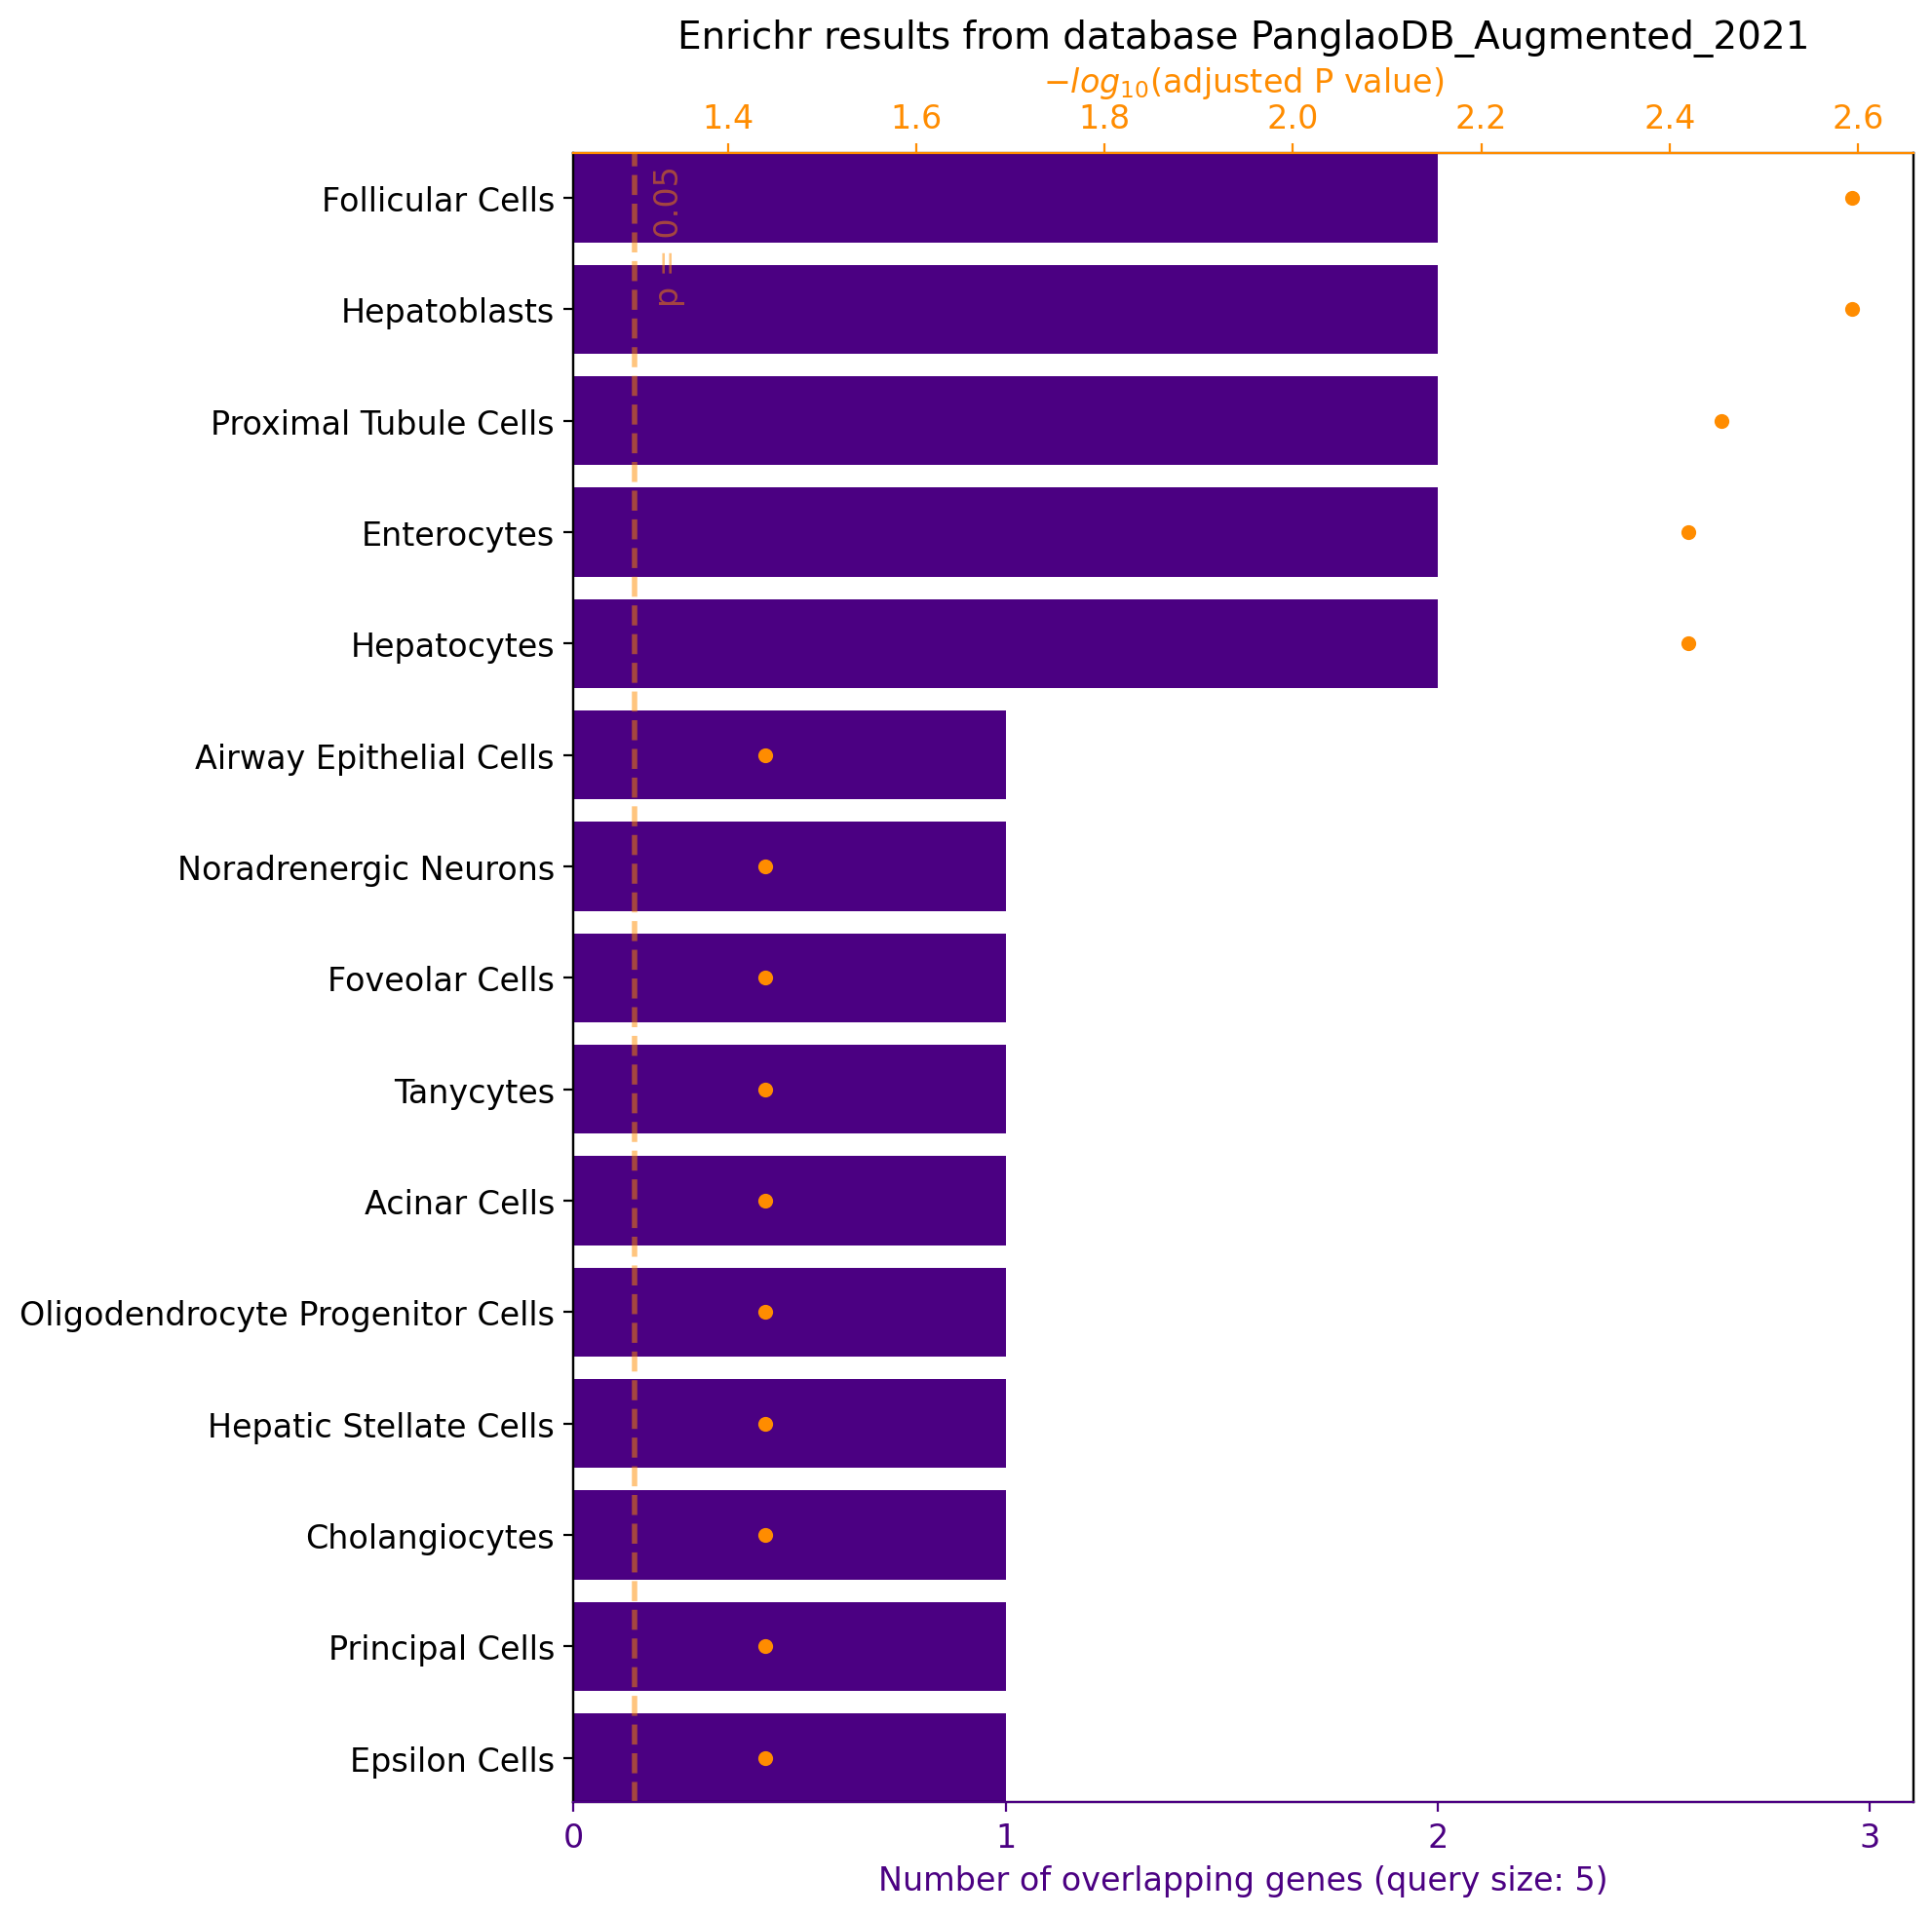

In [6]:
enrichr_df = gget.enrichr(liver_genes[:5], database="celltypes", plot=True)

We can also inspect the dataframe containing all results:

In [7]:
enrichr_df

,rank,path_name,p_val,z_score,combined_score,overlapping_genes,adj_p_val,database
0,1,Follicular Cells,0.000297,122.759259,997.217612,"[GSTA2, ALB]",0.002548,PanglaoDB_Augmented_2021
1,2,Hepatoblasts,0.000318,118.351190,952.964050,"[GSTA2, ALB]",0.002548,PanglaoDB_Augmented_2021
2,3,Proximal Tubule Cells,0.000658,81.617284,598.008573,"[GSTA2, ALB]",0.003507,PanglaoDB_Augmented_2021
3,4,Enterocytes,0.001005,65.651741,453.196785,"[GSTA2, CDO1]",0.003805,PanglaoDB_Augmented_2021
4,5,Hepatocytes,0.001189,60.200913,405.425154,"[GSTA2, ALB]",0.003805,PanglaoDB_Augmented_2021
5,6,Airway Epithelial Cells,0.025488,48.757353,178.916489,[GSTA2],0.036299,PanglaoDB_Augmented_2021
6,7,Noradrenergic Neurons,0.025733,48.281553,176.708864,[ALB],0.036299,PanglaoDB_Augmented_2021
7,8,Foveolar Cells,0.028180,43.986726,156.995603,[GSTA2],0.036299,PanglaoDB_Augmented_2021
8,9,Tanycytes,0.029889,41.406250,145.346969,[CDO1],0.036299,PanglaoDB_Augmented_2021
9,10,Acinar Cells,0.030621,40.390244,140.803434,[GSTA2],0.036299,PanglaoDB_Augmented_2021


This makes sense, since our 5 genes are liver markers after all. However, in the context of the 50 total liver genes tested, only 5 liver genes coming back positive does not seem like much. Indeed, when adding the correct background gene list for this experiment, the enrichment results come back not significant:

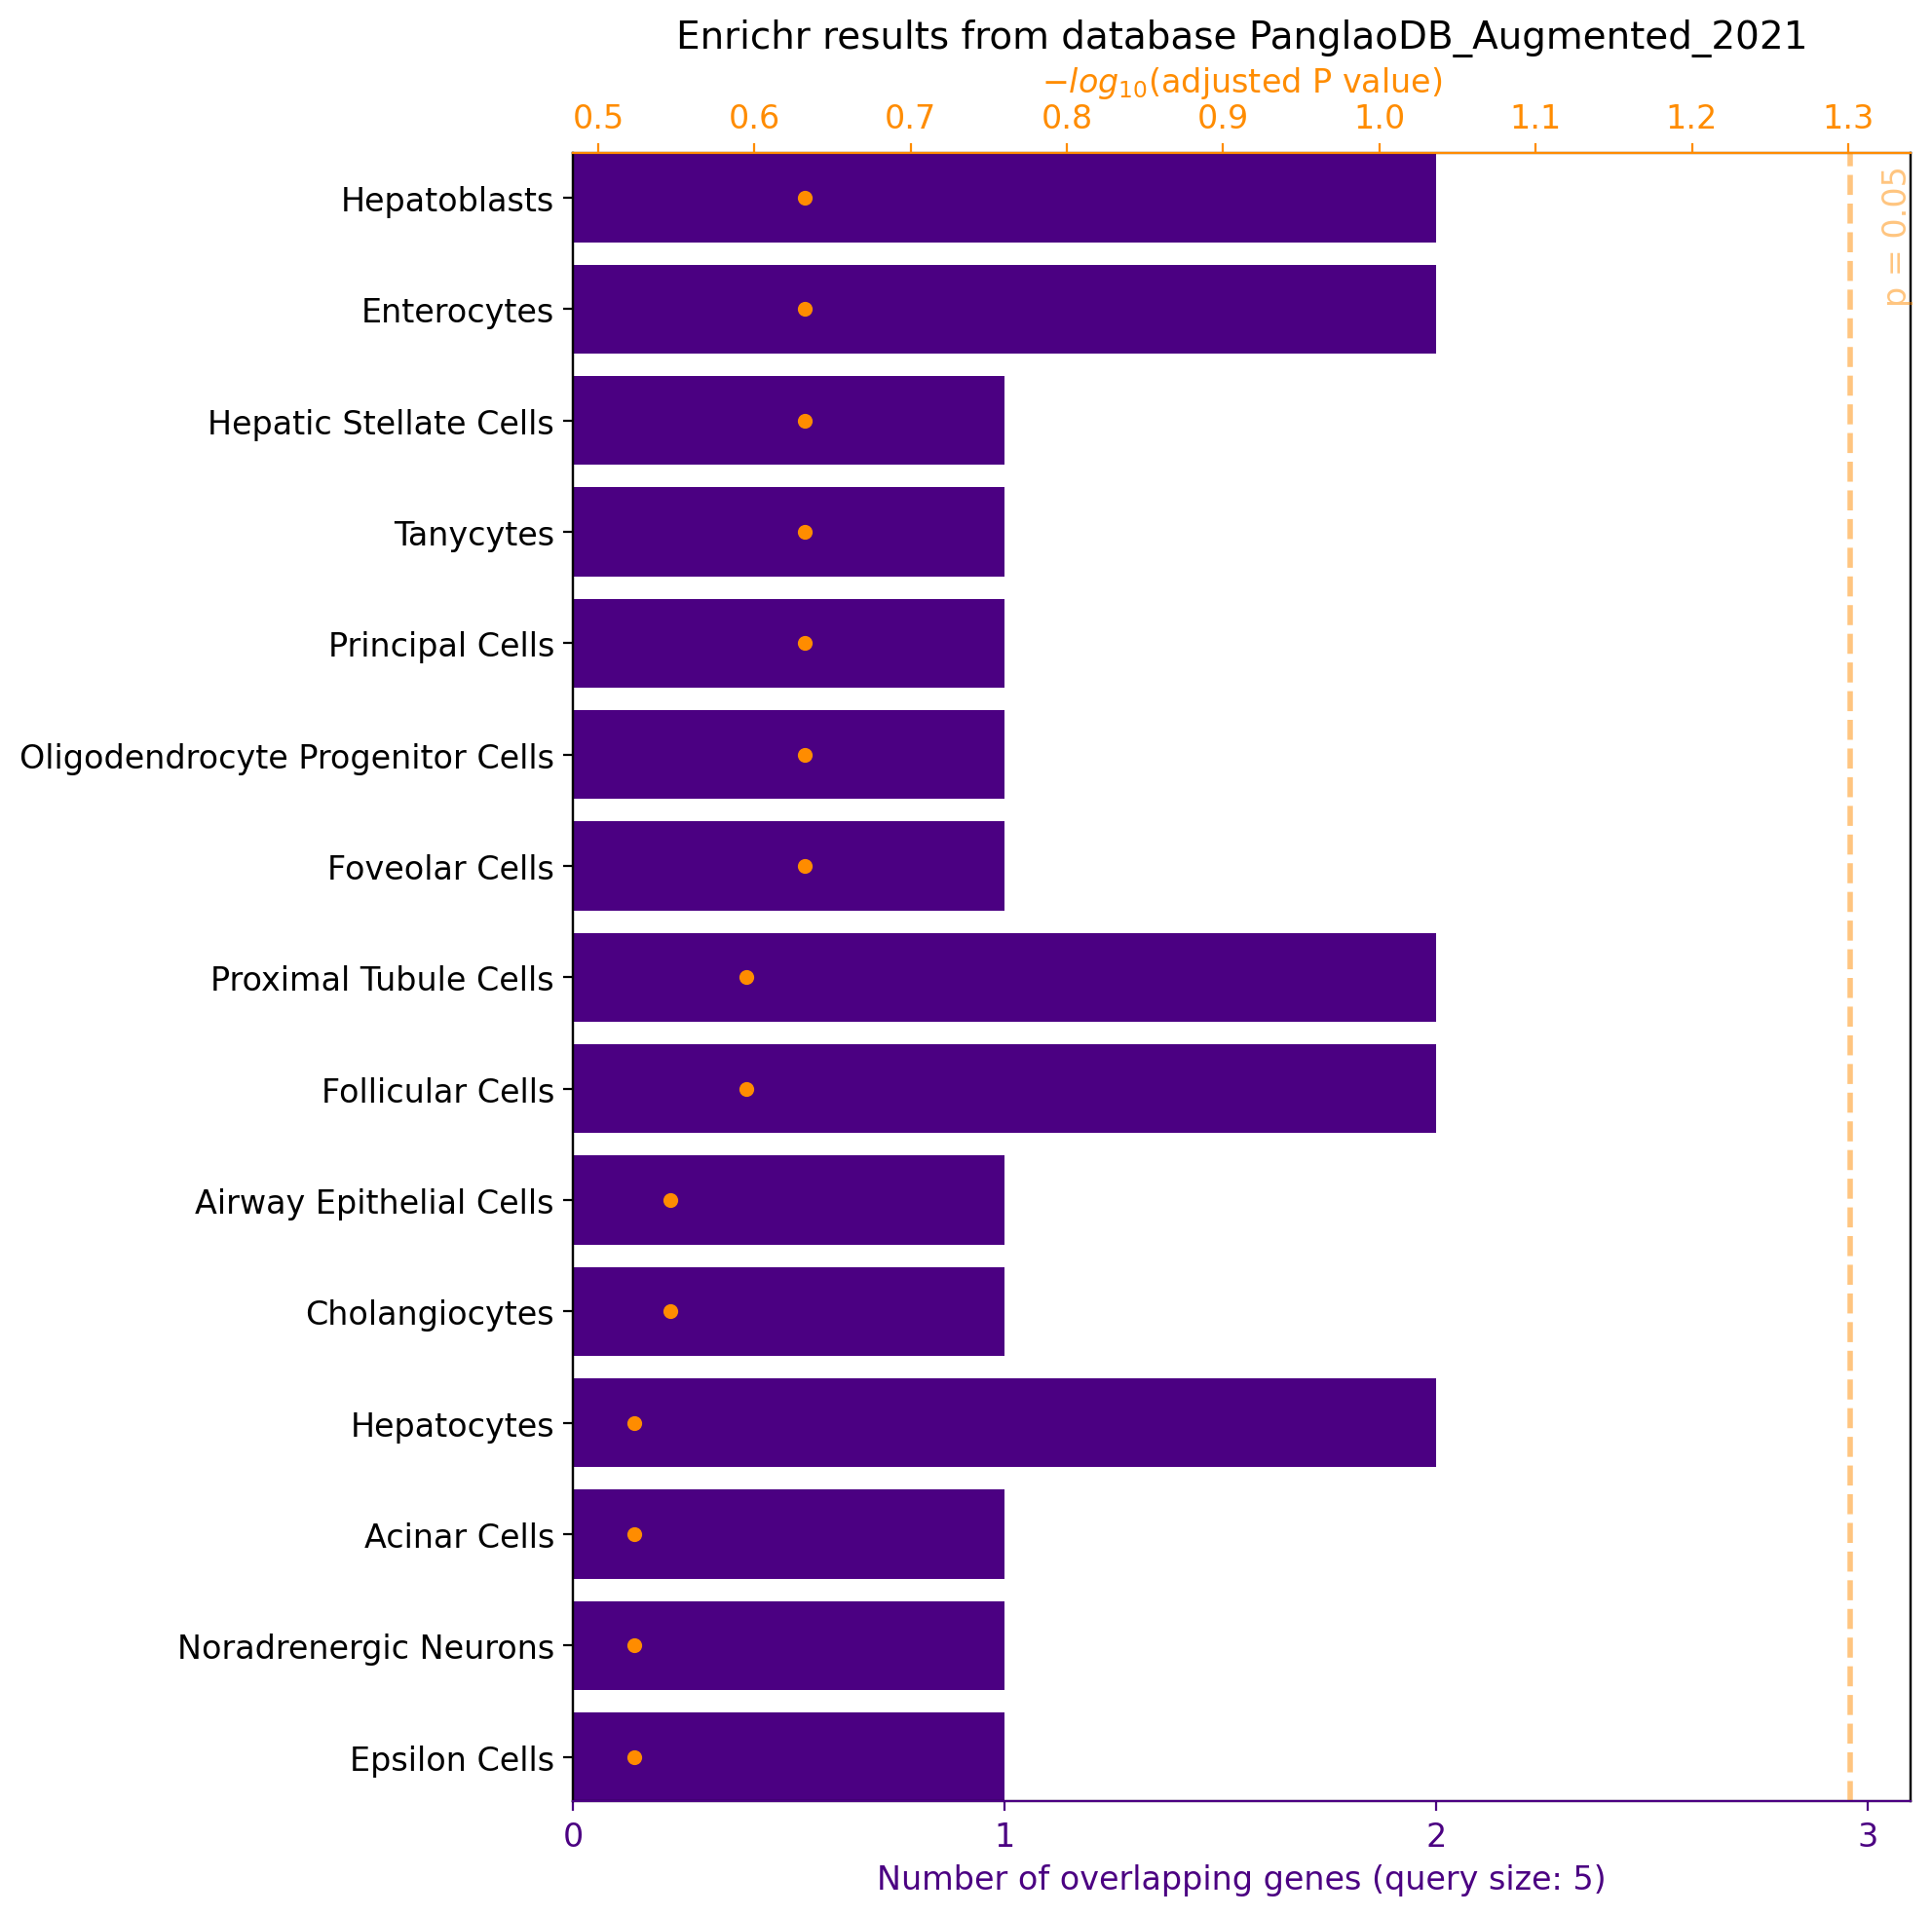

In [8]:
enrichr_df_bkg = gget.enrichr(liver_genes[:5], database="celltypes", background_list=liver_genes, plot=True)

In [9]:
enrichr_df_bkg

,rank,path_name,p_val,z_score,combined_score,overlapping_genes,adj_p_val,database
0,1,Hepatoblasts,0.046749,14.000000,42.881535,"[GSTA2, ALB]",0.233236,PanglaoDB_Augmented_2021
1,2,Enterocytes,0.074530,9.111111,23.657465,"[GSTA2, CDO1]",0.233236,PanglaoDB_Augmented_2021
2,3,Hepatic Stellate Cells,0.102041,inf,inf,[ALB],0.233236,PanglaoDB_Augmented_2021
3,4,Tanycytes,0.102041,inf,inf,[CDO1],0.233236,PanglaoDB_Augmented_2021
4,5,Principal Cells,0.102041,inf,inf,[CDO1],0.233236,PanglaoDB_Augmented_2021
5,6,Oligodendrocyte Progenitor Cells,0.102041,inf,inf,[CDO1],0.233236,PanglaoDB_Augmented_2021
6,7,Foveolar Cells,0.102041,inf,inf,[GSTA2],0.233236,PanglaoDB_Augmented_2021
7,8,Proximal Tubule Cells,0.143011,5.200000,10.113139,"[GSTA2, ALB]",0.254242,PanglaoDB_Augmented_2021
8,9,Follicular Cells,0.143011,5.200000,10.113139,"[GSTA2, ALB]",0.254242,PanglaoDB_Augmented_2021
9,10,Airway Epithelial Cells,0.195578,10.750000,17.541813,[GSTA2],0.284477,PanglaoDB_Augmented_2021
